In [65]:
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
import numpy as np
from matplotlib.colors import ListedColormap
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

In [66]:
def parsen_window(X,y,k,h,
                  u):
    """Classifies as maximum amount training objects of same class in window with radius h, with coefficients certain by Kernel function

    Keyword arguments:
    X -- training sample
    y -- classes of training samples
    k -- Kernel function
    h -- size of window
    u -- object to classify
    """
    p = [k(((x[0]-u[0])**2 + (x[1]-u[1])**2)/h) for x in X]
    bincount = np.bincount(y,p)
    res = np.argmax(bincount)
    if(bincount[res] == 0):
        return -1
    else:
        return res

def k(x,l=1):
    if(x>l):
        return 0;
    else:
        return (l-x)/l;

def frange(start,stop,step):
    if(start>=stop):
        return
    i = start
    while(i<=stop):
        yield i
        i += step
    
def parsen_windw_loo(X,y,k):
    step = 0.025
    wmin = step
    wmax = 4
    vals = []
    val = 0
    u = [[],0]
    diff = len(X)
    for window_width in frange(wmin,wmax,step):
        cd = 0
        for i in range(1,len(X)):
            u[0] = X[i]
            u[1] = y[i]
            Xt = np.delete(X,i,0)
            yt = np.delete(y,i)
            if(parsen_window(Xt,yt,k,window_width,u[0])!=u[1]):
                cd = cd+1
        if(diff>cd):
            diff = cd
            val = window_width
        vals.append(cd)
    return val,vals,step
    

In [67]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [68]:
width,vals,step = parsen_windw_loo(X,y,k)
print(width)
print(vals)
print(step)
print(vals[0])

0.8000000000000004
[59, 45, 38, 31, 32, 32, 31, 32, 33, 33, 33, 34, 31, 30, 31, 31, 31, 30, 30, 30, 30, 30, 30, 29, 30, 30, 30, 30, 28, 28, 28, 27, 28, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37, 37]
0.025
59


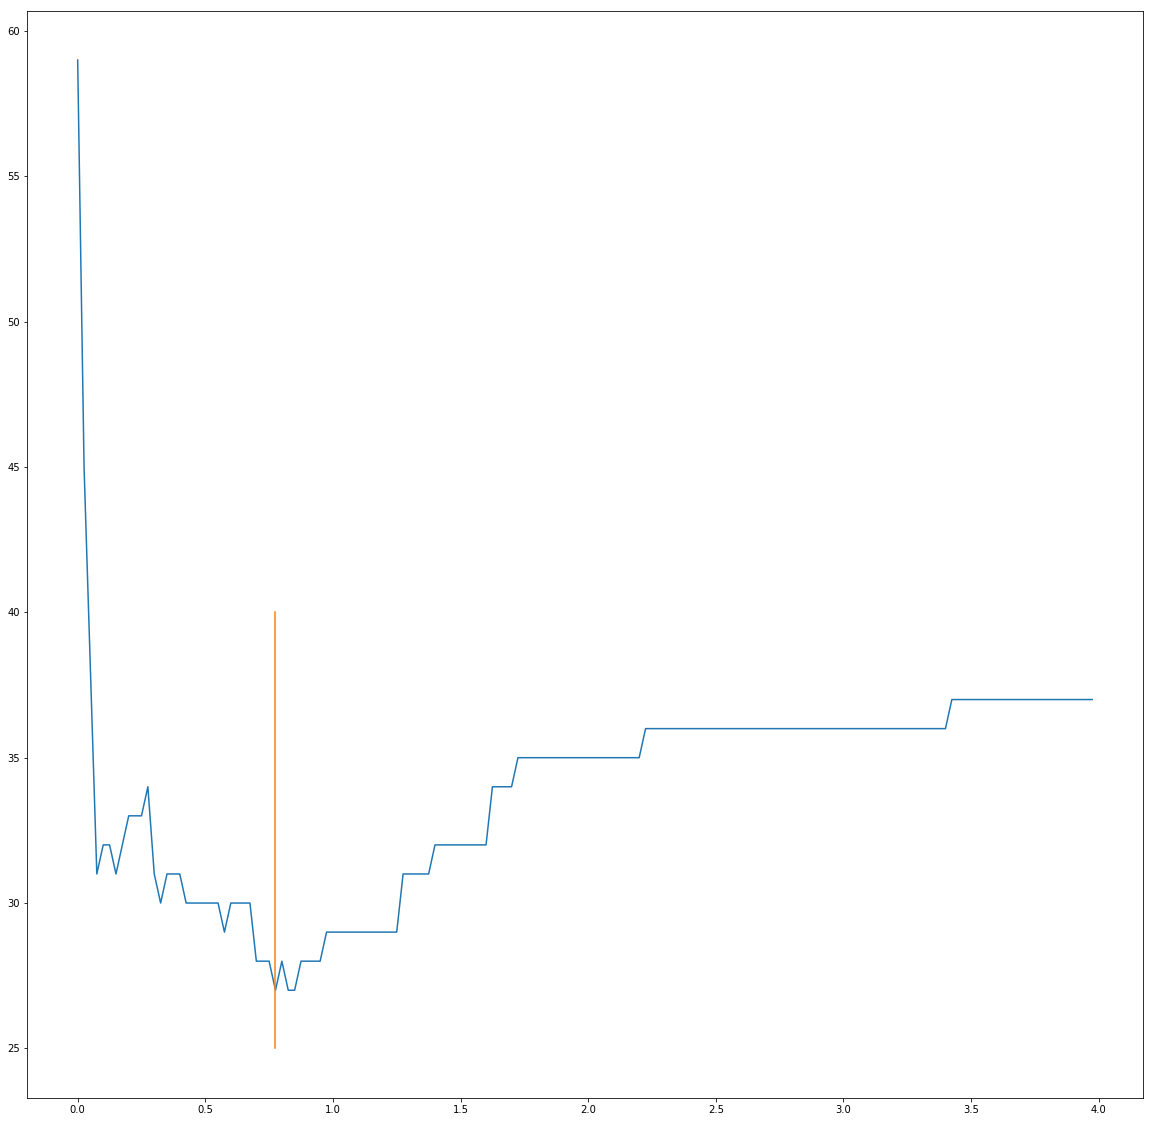

In [70]:
plt.figure(figsize=(20,20))
mvals = [[],[]]
for ls in range(len(vals)):
    #mvals.append([k*step,vals[k]])
    mvals[0].append(vals[ls])
    mvals[1].append(ls*step)
plt.plot(mvals[1],mvals[0])
plt.plot([width-0.025,width-0.025],[25,40])

In [74]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = np.array([parsen_window(X,y,k,width,u) for u in  np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

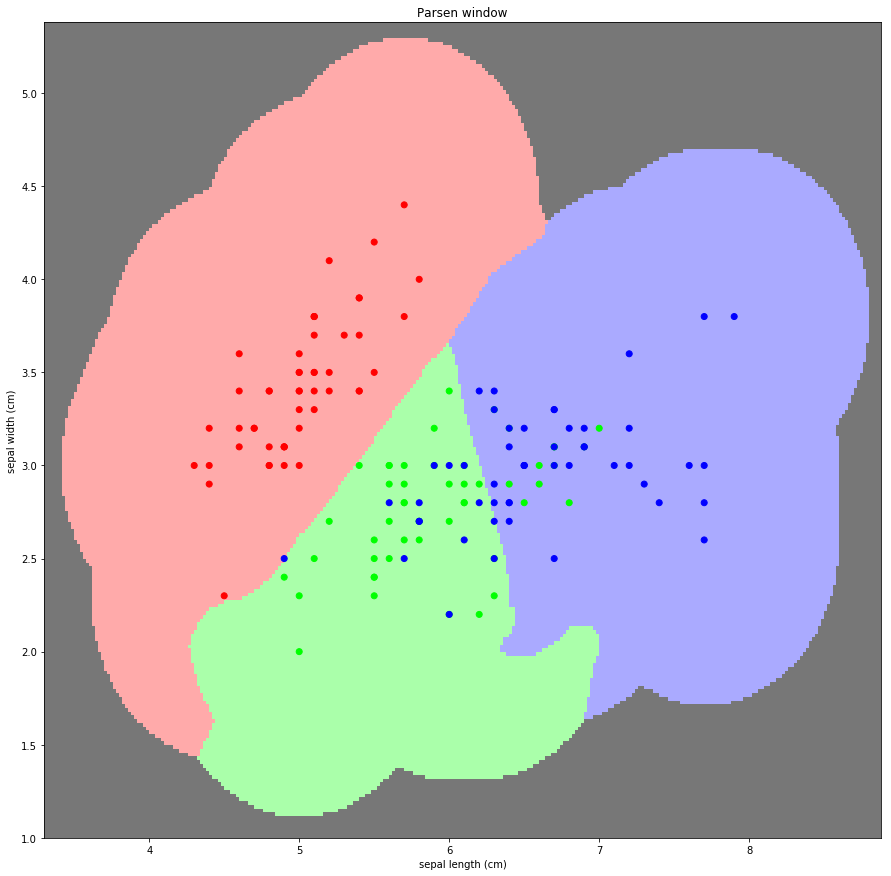

In [75]:
plt.figure(figsize=(15,15))
plt.pcolormesh(xx, yy, Z, cmap=ListedColormap(['#777777','#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X[:,0],X[:,1], c=y, cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Parsen window")
plt.show()